<a href="https://colab.research.google.com/github/ibrahim10sy/learn-python/blob/main/Projet_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet pratique : Prédiction de survie du Titanic**

# **Introduction**

Maintenant que vous savez comment optimiser votre pipeline de machine learning, pratiquons-le avec un jeu de données réel.
Vous utiliserez la validation croisée et une recherche par grille d'hyperparamètres pour optimiser votre pipeline de machine learning.

Vous utiliserez le jeu de données de survie du Titanic pour créer un modèle de classification permettant de prédire si un passager a survécu au naufrage, en fonction des attributs de chaque passager du jeu de données.

Vous commencerez par créer un classificateur de forêt aléatoire, puis vous modifierez votre pipeline pour utiliser un estimateur de régression logistique. Vous évaluerez et comparerez vos résultats.


# **Objectifs**

* Utiliser scikit-learn pour construire un modèle permettant de résoudre un problème de classification
* Mettre en œuvre un pipeline pour combiner vos étapes de prétraitement avec un modèle d'apprentissage automatique
* Interpréter les résultats de votre modélisation
* Mettre à jour votre pipeline avec un autre modèle d'apprentissage automatique
Comparer les performances de vos classificateurs

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install scikit-learn
!pip install seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Titanic Passenger data set
We'll be working with the Titanic passenger dataset to build a classification model to predict whether a passenger survied the sinking of the Titanic.  
Here is the data dictionary:

| Variable   |	Definition   |
 |:------|:--------------------------------|
 |survived | survived? 0 = No, 1 = yes  |
 |pclass | Ticket class (int)  |
 |sex	 |sex |
 |age	 | age in years  |
 |sibsp  |	# of siblings / spouses aboard the Titanic |
 |parch  |	# of parents / children aboard the Titanic |
 |fare   |	Passenger fare   |
 |embarked | Port of Embarkation |
 |class  |Ticket class (obj)   |
 |who    | man, woman, or child  |
 |adult_male | True/False |
 |alive  | yes/no  |
 |alone  | yes/no  |


In [2]:
data = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [4]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.count()

,0
survived,891
pclass,891
sex,891
age,714
sibsp,891
parch,891
fare,891
embarked,889
class,891
who,891


Fonctionnalités à supprimer
Le deck comporte de nombreuses valeurs manquantes, nous allons donc le supprimer. Âge comporte également plusieurs valeurs manquantes. Bien que cela puisse être le cas, « embarqué » et « embarqué_ville » ne semblent pas pertinents, nous les supprimerons donc également. La référence à « vivant » n'étant pas claire, nous l'ignorerons.

Cible
survived est notre variable de classe cible.


In [6]:
X = titanic.drop(['survived', 'deck', 'embark_town', 'alive'], axis=1)
y = titanic['survived']

In [8]:
X

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,3,male,35.0,0,0,8.0500,S,Third,man,True,True
...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,Second,man,True,True
887,1,female,19.0,0,0,30.0000,S,First,woman,False,True
888,3,female,NaN,1,2,23.4500,S,Third,woman,False,False
889,1,male,26.0,0,0,30.0000,C,First,man,True,True


In [9]:
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'who', 'adult_male', 'alone']
target = 'survived'

X = titanic[features]
y = titanic[target]

In [10]:
X

,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alone
0,3,male,22.0,1,0,7.2500,Third,man,True,False
1,1,female,38.0,1,0,71.2833,First,woman,False,False
2,3,female,26.0,0,0,7.9250,Third,woman,False,True
3,1,female,35.0,1,0,53.1000,First,woman,False,False
4,3,male,35.0,0,0,8.0500,Third,man,True,True
...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,Second,man,True,True
887,1,female,19.0,0,0,30.0000,First,woman,False,True
888,3,female,NaN,1,2,23.4500,Third,woman,False,False
889,1,male,26.0,0,0,30.0000,First,man,True,True


Dans quelle mesure les classes sont-elles équilibrées ?

In [12]:
y.value_counts()

,count
survived,
0,549
1,342


In [16]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

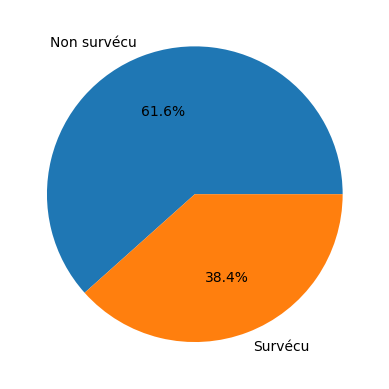

In [18]:
plt.pie(y.value_counts(), labels=['Non survécu', 'Survécu'], autopct='%1.1f%%')
plt.show()

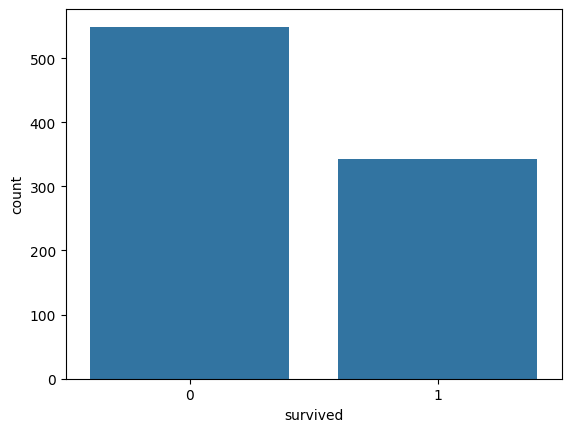

In [19]:
sns.countplot(x='survived', data=titanic)
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Définition de transformateurs de prétraitement pour les caractéristiques numériques et catégorielles

Détection automatique des colonnes numériques et catégorielles et affectation de ces dernières à des caractéristiques numériques et catégorielles distinctes

In [21]:
numerics_feature = X_train.select_dtypes(include=['number']).columns.tolist()

In [22]:
categoriel_feature = X_train.select_dtypes(include=['object','category']).columns.tolist()

In [23]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

Combiner les transformateurs en un seul transformateur de colonne
Nous utiliserons l'estimateur « transformateur de colonne » de sklearn pour transformer séparément les caractéristiques, ce qui concaténera ensuite la sortie en un espace de caractéristiques unique, prêt à être entré dans un estimateur d'apprentissage automatique.

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerics_feature),
        ('cat', categorical_transformer, categoriel_feature)
    ])

In [25]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['pclass', 'age', 'sibsp', 'parch', 'fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['sex', 'class', 'who'])])

Création du modèle Pipeline

In [26]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [27]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['pclass', 'age', 'sibsp',
                                                   'parch', 'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'class', 'who'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

Paramètre grid

In [28]:
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

### Effectuer une validation croisée de recherche de grille et adapter le meilleur modèle aux données d'entraînement

In [29]:
cv = StratifiedKFold(n_splits=5, shuffle=True)

In [30]:
model = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=2)
model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.2s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.2s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.2s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.2s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.2s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pclass',
                                                                          'age',
                                                                          'sibsp',
                                                                          'parch',
                                                                          'fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['sex',
                                                                          'class',
                                                                          'who'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [31]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



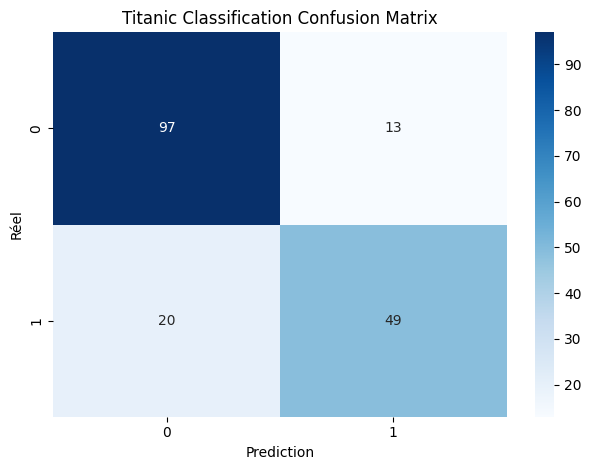

In [32]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Titanic Classification Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Réel')

# Show the plot
plt.tight_layout()
plt.show()

Recherche des meilleurs caractéristiques

In [36]:
model.best_estimator_['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categoriel_feature)

array(['sex_female', 'sex_male', 'class_First', 'class_Second',
       'class_Third', 'who_child', 'who_man', 'who_woman'], dtype=object)

In [38]:
model.best_params_

{'classifier__max_depth': 10,
 'classifier__min_samples_split': 5,
 'classifier__n_estimators': 50}

Notez comment les caractéristiques encodées one-hot sont nommées : par exemple, le sexe a été divisé en deux caractéristiques booléennes indiquant s'il s'agit d'un homme ou d'une femme.

Récoltons maintenant toutes les valeurs d'importance des caractéristiques et associons-les à leurs noms transformés.

In [39]:
feature_importances = model.best_estimator_['classifier'].feature_importances_

# Combine the numerical and one-hot encoded categorical feature names
feature_names = numerics_feature + list(model.best_estimator_['preprocessor']
                                        .named_transformers_['cat']
                                        .named_steps['onehot']
                                        .get_feature_names_out(categoriel_feature))

In [40]:
feature_names

['pclass',
 'age',
 'sibsp',
 'parch',
 'fare',
 'sex_female',
 'sex_male',
 'class_First',
 'class_Second',
 'class_Third',
 'who_child',
 'who_man',
 'who_woman']

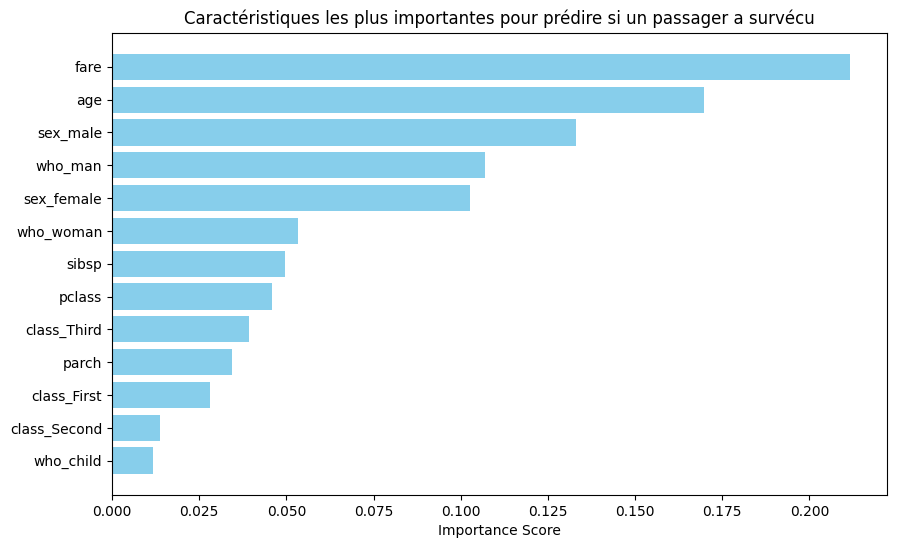


Test set accuracy: 81.56%


In [48]:
importance_df = pd.DataFrame({'Feature': feature_names,
                              'Importance': feature_importances
                             }).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
# plt.hist(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Caractéristiques les plus importantes pour prédire si un passager a survécu')
plt.xlabel('Importance Score')
plt.show()

# Print test score
test_score = model.score(X_test, y_test)
print(f"\nTest set accuracy: {test_score:.2%}")

La précision de l'ensemble de tests est plutôt satisfaisante. Cependant, concernant l'importance des caractéristiques, il est crucial de comprendre qu'il existe probablement une forte dépendance entre ces variables, et qu'une approche de modélisation plus détaillée, incluant une analyse de corrélation, est nécessaire pour tirer des conclusions pertinentes. Par exemple, il ne fait aucun doute que les variables « âge », « sexe masculin » et « qui_homme » partagent des informations significatives.

In [49]:
conf_corr = confusion_matrix(y_test, y_pred)

<Axes: >

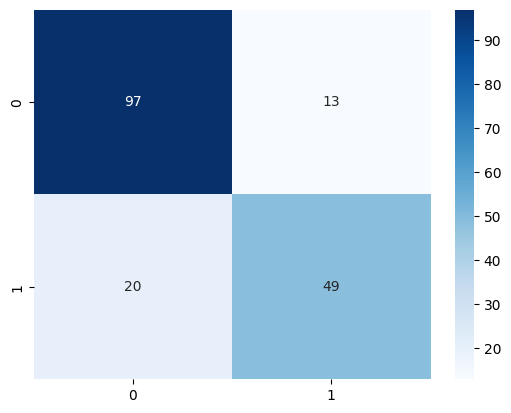

In [50]:
sns.heatmap(conf_corr, annot=True, cmap='Blues', fmt='d')

In [51]:
pipeline.set_params(classifier=LogisticRegression(random_state=42))

# update the model's estimator to use the new pipeline
model.estimator = pipeline

# Define a new grid with Logistic Regression parameters
param_grid = {
    # 'classifier__n_estimators': [50, 100],
    # 'classifier__max_depth': [None, 10, 20],
    # 'classifier__min_samples_split': [2, 5],
    'classifier__solver' : ['liblinear'],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight' : [None, 'balanced']
}

model.param_grid = param_grid

# Fit the updated pipeline with Logistic Regression
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=No

In [52]:
model

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pclass',
                                                                          'age',
                                                                          'sibsp',
                                                                          'parch',
                                                                          'fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['sex',
                                                                          'class',
                                                                          'who'])])),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'classifier__class_weight': [None, 'balanced'],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear']},
             scoring='accuracy', verbose=2)

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



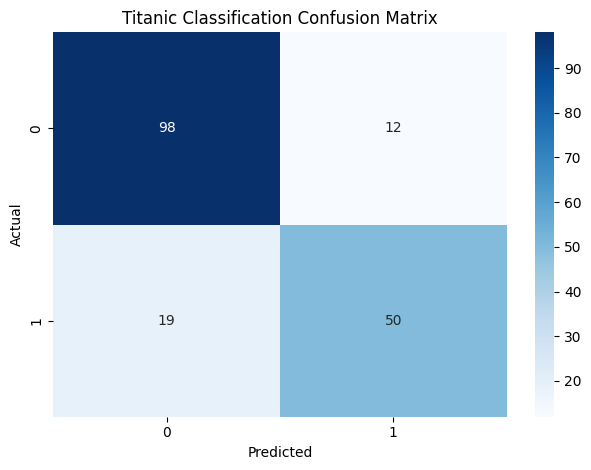

In [56]:
conf_matrix = confusion_matrix(y_test,y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Titanic Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

In [57]:
coefficients = model.best_estimator_.named_steps['classifier'].coef_[0]

# Combine numerical and categorical feature names
numerical_feature_names = numerics_feature
categorical_feature_names = (model.best_estimator_.named_steps['preprocessor']
                                     .named_transformers_['cat']
                                     .named_steps['onehot']
                                     .get_feature_names_out(categoriel_feature)
                            )
feature_names = numerical_feature_names + list(categorical_feature_names)

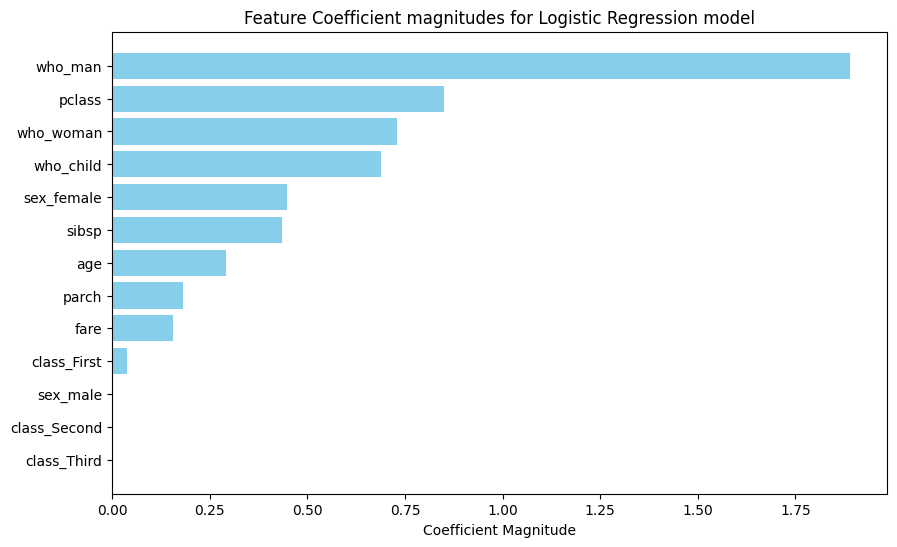


Test set accuracy: 82.68%


In [59]:
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient':coefficients
}).sort_values(by='Coefficient', ascending=False, key=abs)  # Sort by absolute values

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'].abs(), color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Coefficient magnitudes for Logistic Regression model')
plt.xlabel('Coefficient Magnitude')
plt.show()

# Print test score
test_score = model.best_estimator_.score(X_test,y_test)
print(f"\nTest set accuracy: {test_score:.2%}")